# **Level 1**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
df = pd.read_csv('/content/Dataset .csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [15]:
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [16]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [17]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# **Task 1**

# Determine the top three most common cuisines in the dataset.

In [19]:
top_cuisines = df['Cuisines'].str.split(',').explode().value_counts().head(3)
print("Top 3 Cuisines:\n", top_cuisines)

Top 3 Cuisines:
 Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


# Calculate the percentage of restaurants that serve each of the top cuisines.

In [20]:
top_cuisines_percent = (top_cuisines / len(df)) * 100
print("Percentage of Restaurants serving top cuisines:\n", top_cuisines_percent)


Percentage of Restaurants serving top cuisines:
 Cuisines
North Indian    31.326563
 Chinese        19.683803
 Fast Food      13.757722
Name: count, dtype: float64


#**Task 2**

#Identify the city with the highest number of restaurants in the dataset.

In [21]:
city_counts = df['City'].value_counts()
print("City with the highest number of restaurants:", city_counts.idxmax())

City with the highest number of restaurants: New Delhi


# Calculate the average rating for restaurants in each city

In [22]:
city_avg_ratings = df.groupby('City')['Aggregate rating'].mean()
print("Average rating for each city:\n", city_avg_ratings)

Average rating for each city:
 City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


# Determine the city with the highest average rating.

In [23]:
city_with_highest_avg_rating = city_avg_ratings.idxmax()
print("City with the highest average rating:", city_with_highest_avg_rating)

City with the highest average rating: Inner City


#**Task 3**

# Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

<ipython-input-25-3410928535c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette="viridis")


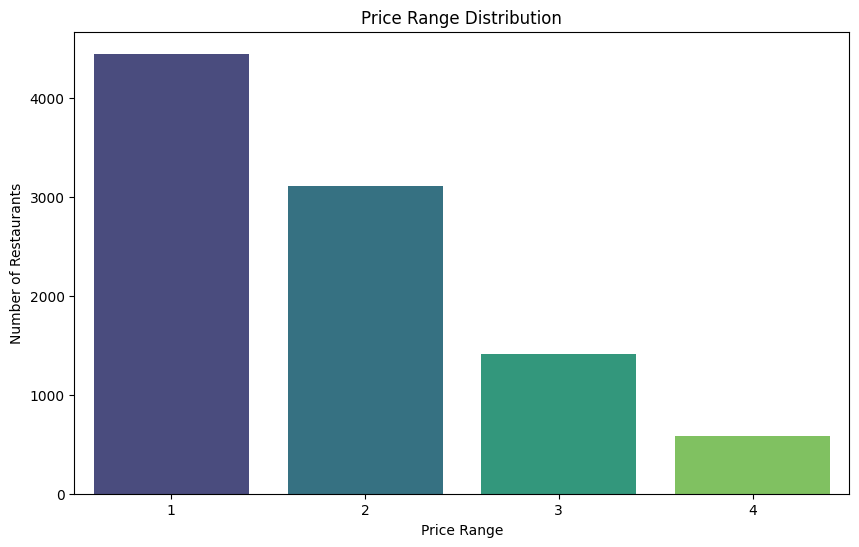

In [25]:
price_range_counts = df['Price range'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette="viridis")
plt.title('Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.show()

#Calculate the percentage of restaurants in each price range category.

In [24]:
price_range_percent = (price_range_counts / len(df)) * 100
print("Percentage of restaurants in each price range category:\n", price_range_percent)

Percentage of restaurants in each price range category:
 Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


#**Task 4**

# Determine the percentage of restaurants that offer online delivery.

In [26]:
online_delivery_percent = (df['Has Online delivery'].value_counts(normalize=True) * 100).to_dict()
print("Percentage of restaurants that offer online delivery:", online_delivery_percent)

Percentage of restaurants that offer online delivery: {'No': 74.33776567898649, 'Yes': 25.662234321013504}


# Compare the average ratings of restaurants with and without online delivery.

In [27]:
avg_rating_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

print("Average rating of restaurants with online delivery:", avg_rating_with_delivery)
print("Average rating of restaurants without online delivery:", avg_rating_without_delivery)


Average rating of restaurants with online delivery: 3.2488372093023257
Average rating of restaurants without online delivery: 2.465295774647887
